In [1]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
from matplotlib import pyplot as plt

# The stochastic SEIR model

In [3]:
from seir_hawkes.py_hawkesn_sir.py_hawkesn_sir.seir_stochastic \
    import StochasticSEIR

## Plotting the model with two different sets of parameters

In [34]:
s_0 = 80
e_0 = 0
i_0 = 20
r_0 = 0

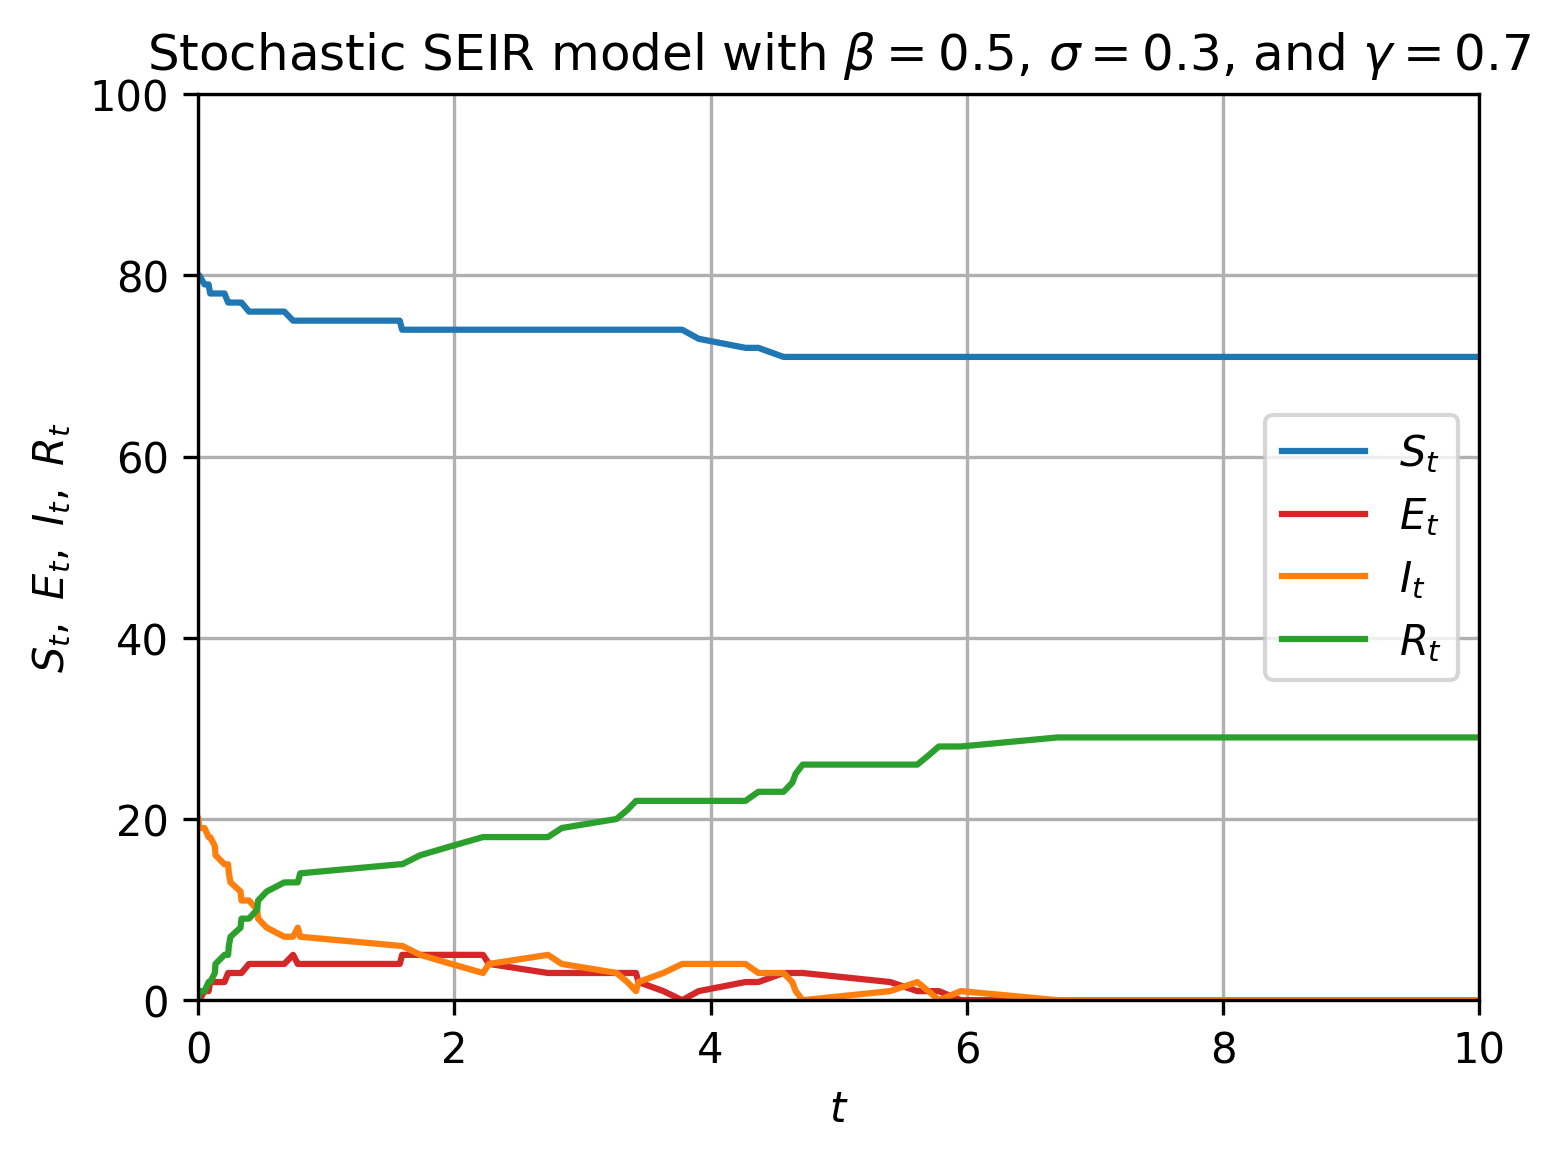

In [5]:
seir_model = StochasticSEIR(
    s_0=s_0, e_0=e_0, i_0=i_0, r_0=0,
    beta=.5, sigma=.3, gamma=.7,
)
seir_model.simulate(n_simulations=1,
                   random_state=0,
                   verbose=False)
seir_model.plot()

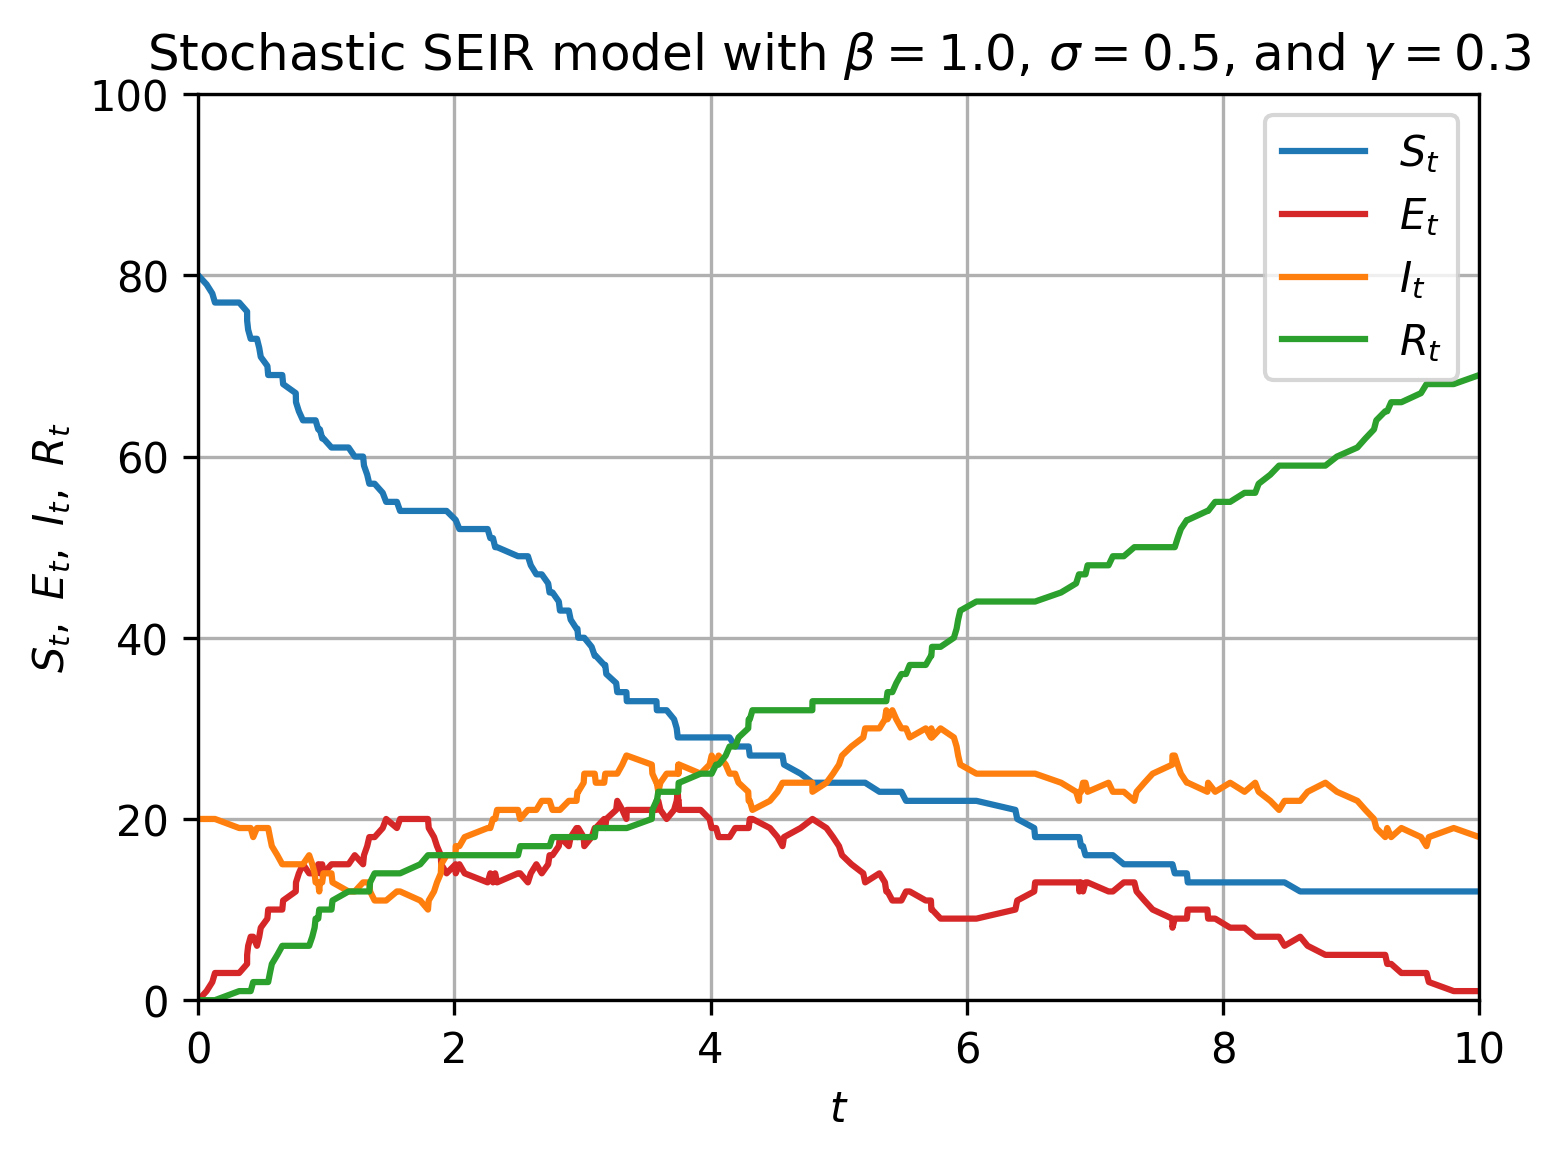

In [6]:
seir = StochasticSEIR(
    s_0=s_0, e_0=e_0, i_0=i_0, r_0=r_0,
    beta=1.0, sigma=0.5, gamma=0.3)
seir.simulate(random_state=3)
seir.plot(fname="seir_stoch_i_inc")

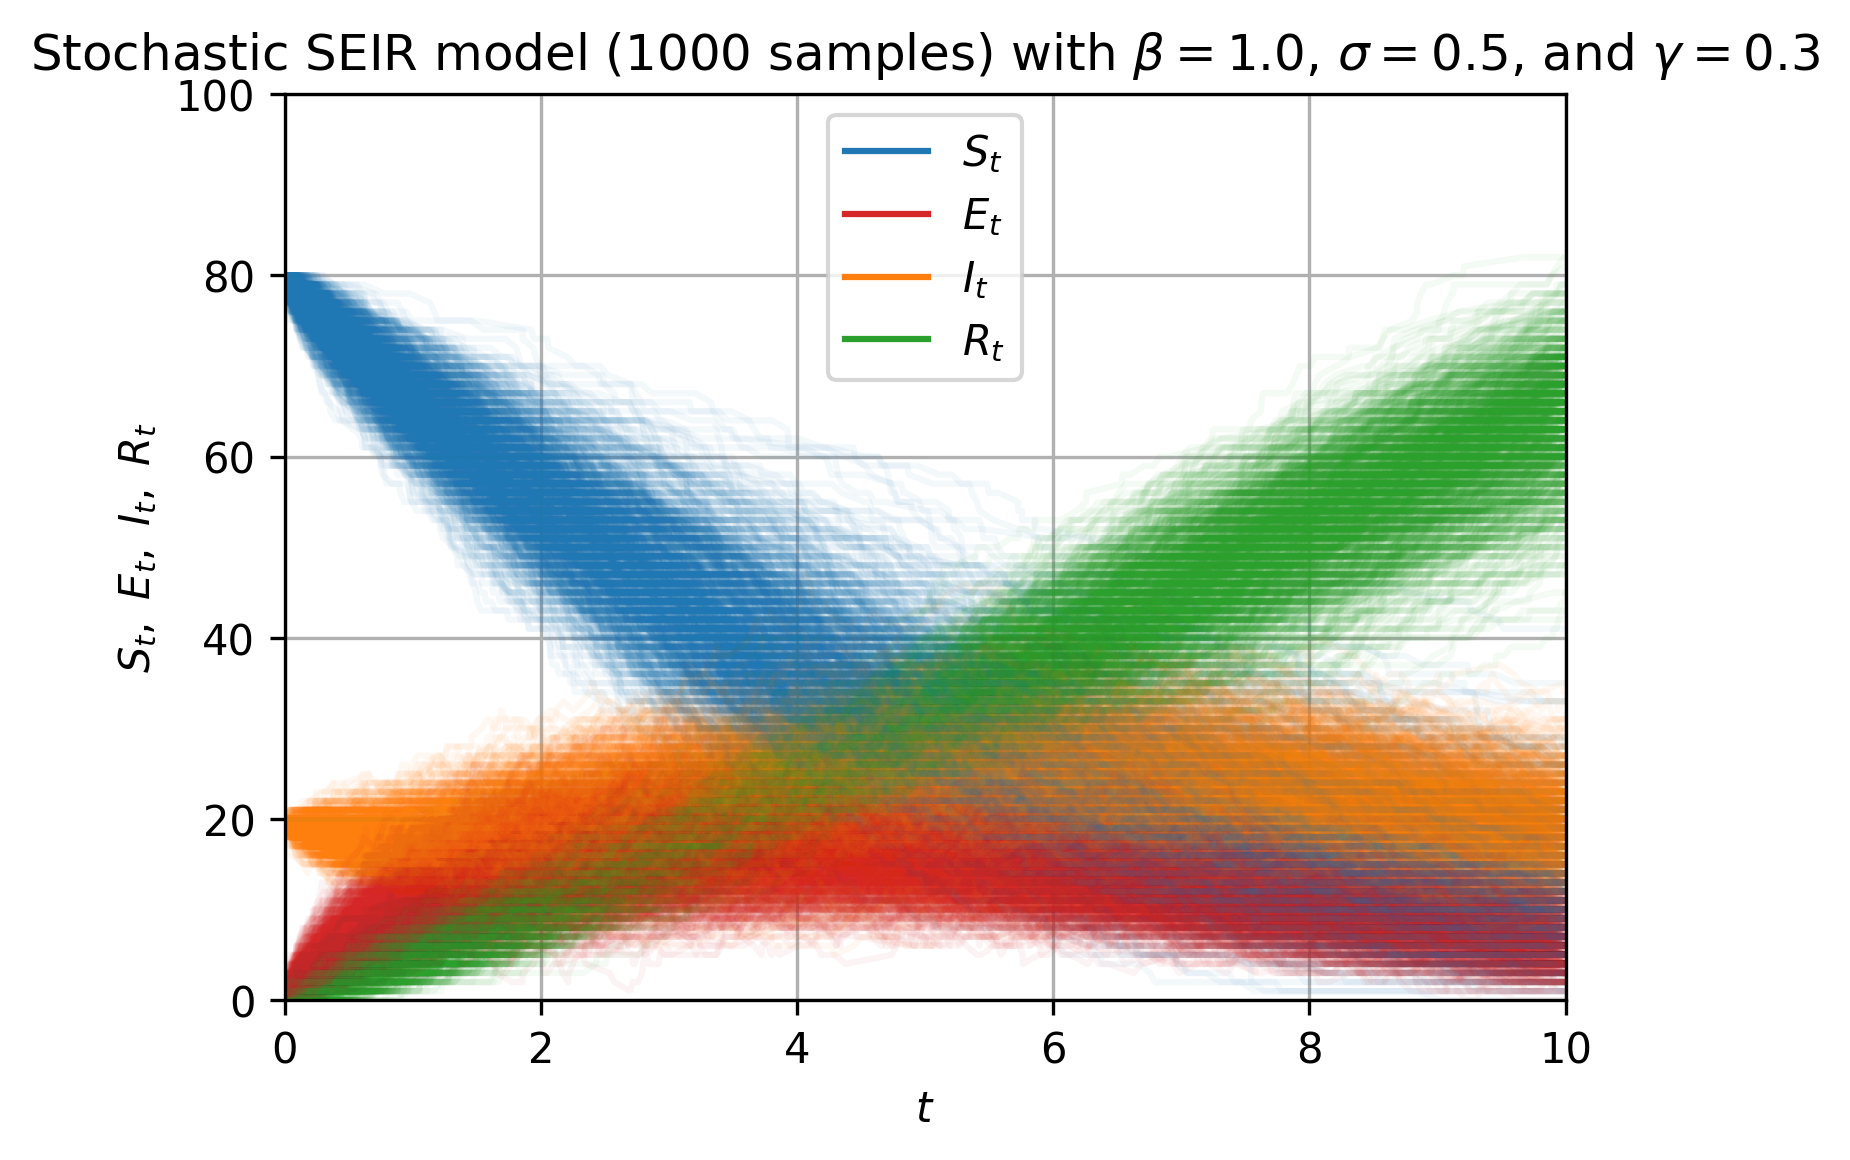

In [35]:
seir = StochasticSEIR(
    s_0=s_0, e_0=e_0, i_0=i_0, r_0=r_0,
    beta=1.0, sigma=0.5, gamma=0.3)
seir.simulate(random_state=3,
              n_simulations=1000)
seir.plot(fname="seir_stoch_i_inc")

## A Priori Distribution

In [23]:
import numpy as np

s_0, e_0, i_0, r_0 = 350, 0, 105, 0
n = sum([s_0, e_0, i_0, r_0])

n_simulations = 20
random_state = 0

seir_model = StochasticSEIR(s_0=s_0,
                            e_0=e_0,
                            i_0=i_0,
                            r_0=r_0,
                            beta=1,
                            sigma=0.5,
                            gamma=0.3
)
seir_model.simulate(t_max=np.inf,
                   n_simulations=n_simulations,
                   random_state=random_state
)

In [24]:
from seir_hawkes.py_hawkesn_sir.py_hawkesn_sir.util import get_index_for_triples, get_index_for_triples

In [25]:
from seir_hawkes.py_hawkesn_sir.py_hawkesn_sir.seir_stochastic_parallel import transition_matrix

In [26]:
trans_mat = transition_matrix(
    n,
    beta=seir_model.beta,
    sigma=seir_model.sigma,
    gamma=seir_model.gamma
)
n_possible_states = trans_mat.shape[0]
state_arr = np.zeros(n_possible_states)
state_arr[get_index_for_triples(s_0, e_0, i_0, n)] = 1

Text(0.5, 1.0, 'a priori distribution of total infections')

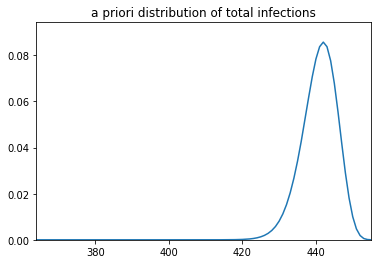

In [33]:
state_apr = state_arr.copy()
for _ in range(3*n - 1):
    state_apr = trans_mat.dot(state_apr)

state_indices_end = [None for _ in range(n+1)]
for n_susceptibles_end in range(n+1):
    state_indices_end[n_susceptibles_end] = get_index_for_triples(
        n_susceptibles_end , 0, 0, n)
plt.figure()
plt.xlim(0, 1300)
plt.ylim(ymin=0, ymax=max(state_apr)*1.1)
plt.plot(
    n-np.arange(n+1),
    state_apr[state_indices_end],
    label="a priori"
)
plt.xlim(left=n*0.8, right=n)
plt.title("a priori distribution of total infections")

## A Posteriori Distribution

In [28]:
def state_after_time(time, simulation):
    """
    Parameters
    ==========
    
    time : float
    
    simulation : pandas.DataFrame
    
    Returns
    =======
    state_tuple : tuple
        Tuple with two entries. The first (second) entry
        specifies the number of susceptibles (infected)
        after time `time`.
    """
    row = simulation.t.values.searchsorted(time, side="right") - 1
    state = simulation.iloc[row]
    return int(state["s"]), int(state["e"]), int(state["i"])

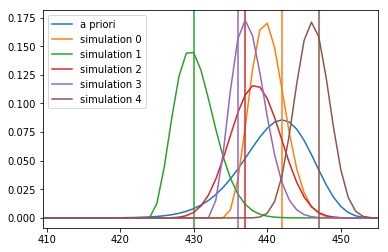

In [32]:
plt.plot(n-np.arange(n+1),
         state_apr[state_indices_end],
         label="a priori")

for sim_ind in range(5):
    epidemic_time = seir_model.data_[sim_ind].t.values[-1]
    time = epidemic_time / 2
    s_apo, e_apo, i_apo = state_after_time(time, seir_model.data_[sim_ind])
    state_apo = np.zeros(n_possible_states)
    state_apo[get_index_for_triples(s_apo, e_apo, i_apo, n)] = 1
    for _ in range(3*n - 1):
        state_apo = trans_mat.dot(state_apo)
    plt.plot(n-np.arange(n+1),
             state_apo[state_indices_end],
             color="C"+str(sim_ind+1),
             label="simulation " + str(sim_ind))
    tot_inf = n - state_after_time(np.inf, seir_model.data_[sim_ind])[0]
    plt.axvline(tot_inf,
                color="C"+str(sim_ind+1),
                #label="simulation " + str(sim_ind)
    )
plt.xlim(n*0.9, n)
plt.legend()